# Template Matching

In [20]:
import cv2 
import matplotlib.pyplot as plt

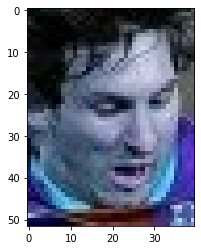

In [21]:
img_rgb = cv2.imread('messi_face7.jpg')
plt.imshow(img_rgb)


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_rgb = cv2.imread('messi.jpg')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
 
template = cv2.imread('messi_face7.jpg',0)
 
w, h = template.shape[::-1]
 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
 
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,255,0), 2)
#plt.imshow(img_rgb)
cv2.imshow("img",img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

# Face and eye detection

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml') 
  
# capture frames from a camera
cap = cv2.VideoCapture(0)
  
# loop runs if capturing has been initialized.
while 1: 
  
    # reads frames from a camera
    ret, img = cap.read() 
  
    # convert to gray scale of each frames
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    # Detects faces of different sizes in the input image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
    for (x,y,w,h) in faces:
        # To draw a rectangle in a face 
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
  
        # Detects eyes of different sizes in the input image
        eyes = eye_cascade.detectMultiScale(roi_gray) 
  
        #To draw a rectangle in eyes
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2)
  
    # Display an image in a window
    cv2.imshow('img',img)
  
    # Wait for Esc key to stop
    k = cv2.waitKey(20) & 0xff
    if k == 27:
        break
  
cap.release()
  
# De-allocate any associated memory usage
cv2.destroyAllWindows() 

# Circle Detection

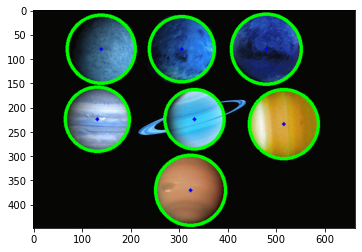

In [29]:
import cv2
import numpy as np
 
 
planets= cv2.imread('planet_glow-1.jpg')
gray_img=cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img= cv2.medianBlur(gray_img, 5)
#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
 
#center
 
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,param1=100,param2=30,minRadius=50,maxRadius=100)
circles = np.uint16(np.around(circles))
 
for i in circles[0,:]:
    cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),6)
    cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)
 
plt.imshow(planets)
